/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


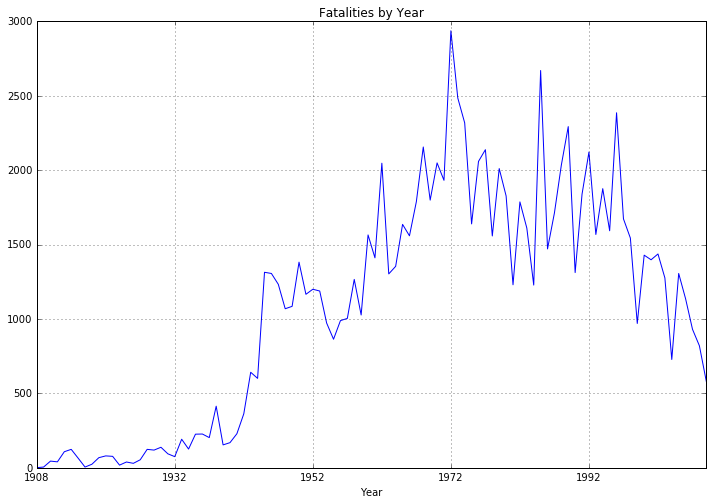

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import matplotlib
from sklearn.linear_model import LinearRegression
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))
frame = pd.read_csv('../input/Airplane_Crashes_and_Fatalities_Since_1908.csv')
#print(frame)
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)
operator = frame[['Operator','Fatalities']].groupby('Operator').agg(['sum','count'])
def getyear(dates):
    res = []
    for d in dates:
        tmp = d.strip().split("/")
        if len(tmp) == 3:
            res.append(tmp[-1])
        else:
            res.append('NaN')
    return res
year = getyear(frame['Date'])

df1 = frame[['Fatalities']]
df1['Year'] = pd.Series(year).values
yeardat = df1.groupby('Year').agg(['sum','count'])
fatalities = yeardat['Fatalities','sum']
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
fatalities.plot(kind='line',title='Fatalities by Year',ax=ax1,grid=True)
# Any results you write to the current directory are saved as output.

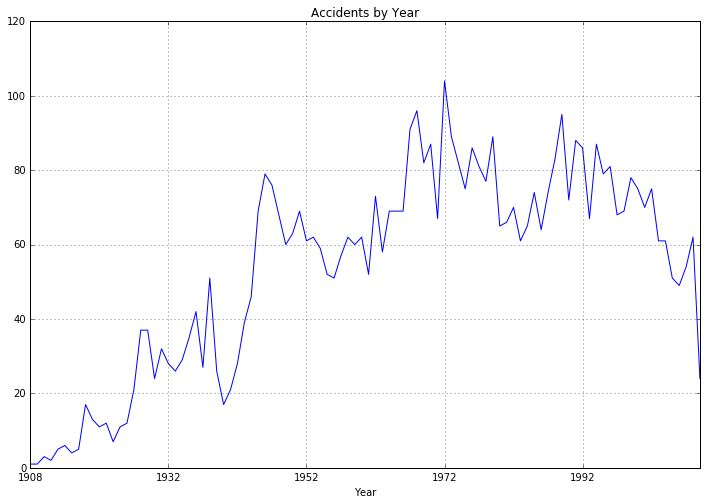

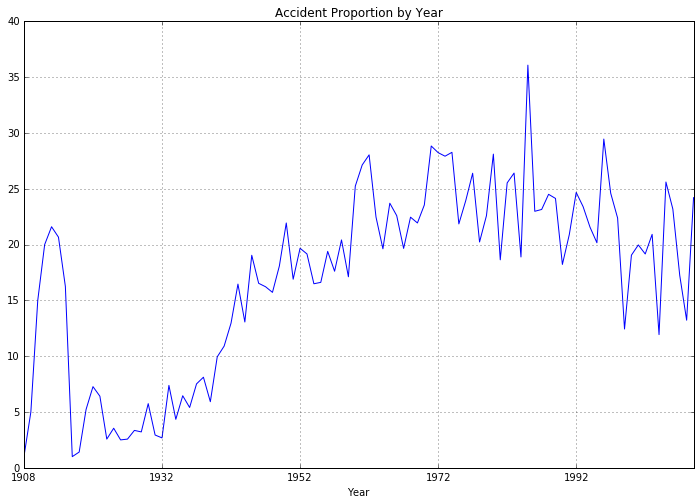

In [2]:
accidents = yeardat['Fatalities','count']
accidents.plot(kind='line',title='Accidents by Year',grid=True)
accprop = fatalities/accidents
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
accprop.plot(kind='line',title='Accident Proportion by Year',ax=ax2,grid=True)

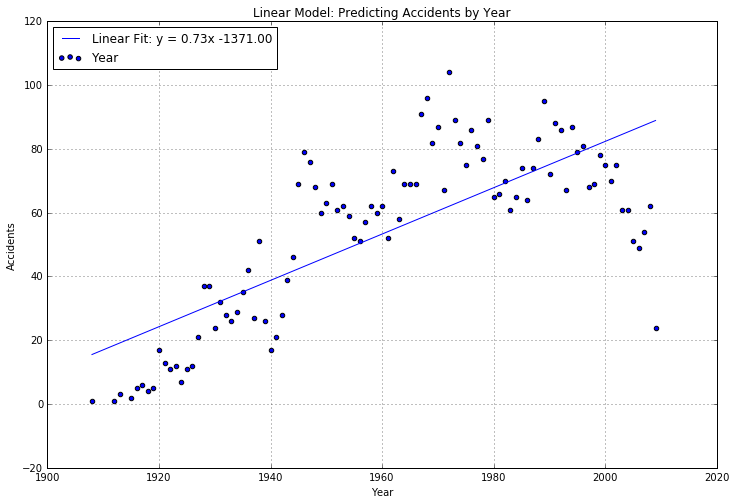

In [3]:
yeardat.dropna(inplace=True)
temp = yeardat.reset_index()
X = temp['Year']
Y1 = temp['Fatalities','count']
Y2 = temp['Fatalities','sum']
model1 = LinearRegression()
#print(X)
model1.fit(X.values.reshape(-1,1),Y1.values.reshape(-1,1))
m = model1.coef_[0][0]
c = model1.intercept_[0]

fig_fit,axd=plt.subplots()

axd.scatter(list(X),Y1,label='Year')
axd.set_title('Linear Model: Predicting Accidents by Year')
axd.plot(X,model1.predict(X.values.reshape(-1,1)),label='Linear Fit: y = %2.2fx %2.2f' % (m,c))
axd.grid(True)
axd.set_xlabel('Year')
axd.set_ylabel('Accidents')
axd.legend(loc=2)

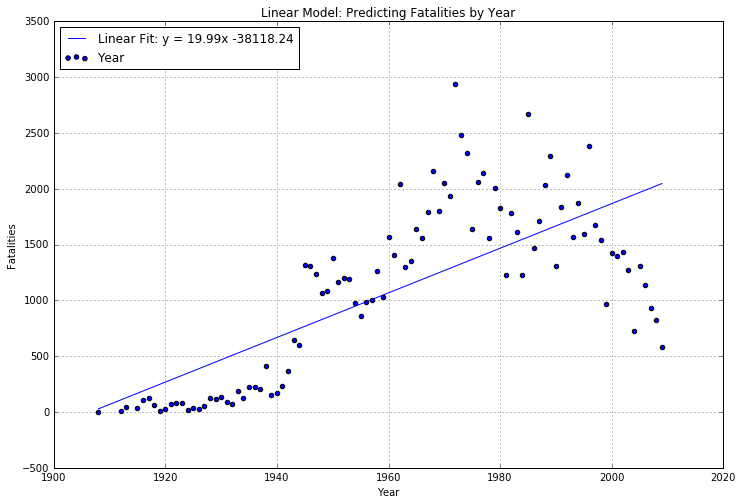

In [4]:
model2 = LinearRegression()
#print(X)
model2.fit(X.values.reshape(-1,1),Y2.values.reshape(-1,1))
m = model2.coef_[0][0]
c = model2.intercept_[0]

fig_fit,axd=plt.subplots()

axd.scatter(list(X),Y2,label='Year')
axd.set_title('Linear Model: Predicting Fatalities by Year')
axd.plot(X,model2.predict(X.values.reshape(-1,1)),label='Linear Fit: y = %2.2fx %2.2f' % (m,c))
axd.grid(True)
axd.set_xlabel('Year')
axd.set_ylabel('Fatalities')
axd.legend(loc=2)

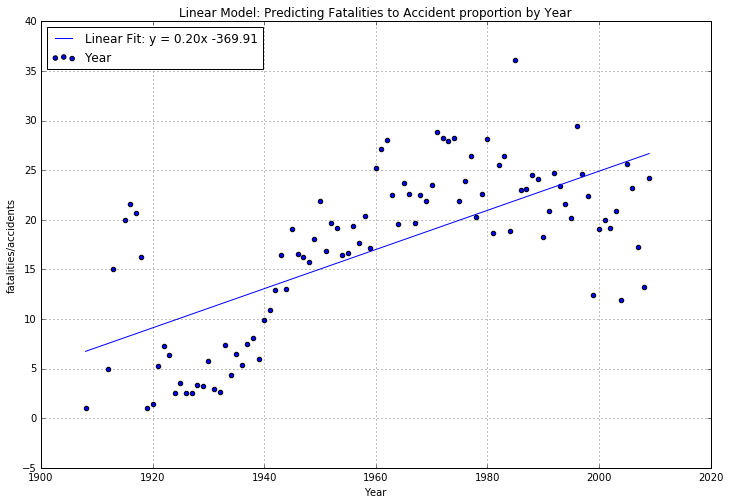

In [5]:
model3 = LinearRegression()
#print(X)
model3.fit(X.values.reshape(-1,1),accprop.values.reshape(-1,1))
m = model3.coef_[0][0]
c = model3.intercept_[0]

fig_fit,axd=plt.subplots()

axd.scatter(list(X),accprop,label='Year')
axd.set_title('Linear Model: Predicting Fatalities to Accident proportion by Year')
axd.plot(X,model3.predict(X.values.reshape(-1,1)),label='Linear Fit: y = %2.2fx %2.2f' % (m,c))
axd.grid(True)
axd.set_xlabel('Year')
axd.set_ylabel('fatalities/accidents')
axd.legend(loc=2)

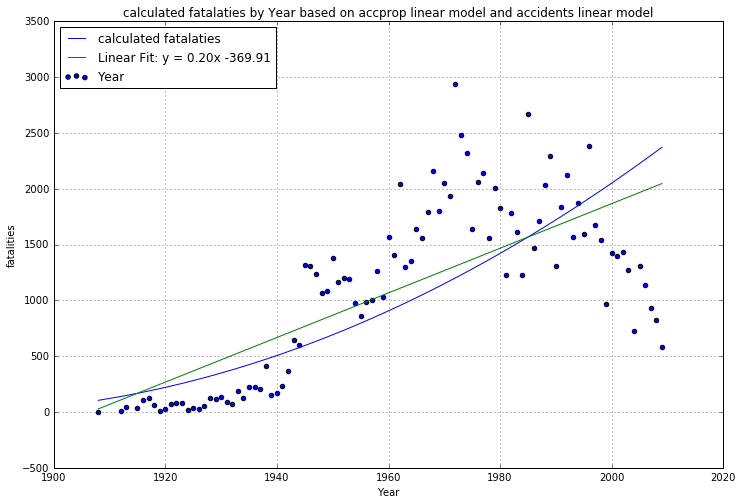

In [6]:
pred_accprop = model3.predict(X.values.reshape(-1,1))
pred_acc = model1.predict(X.values.reshape(-1,1))
calc_fatal = pred_acc*pred_accprop
fig_fit,axd=plt.subplots()

axd.scatter(list(X),Y2,label='Year')
axd.set_title('calculated fatalaties by Year based on accprop linear model and accidents linear model')
axd.plot(X,calc_fatal,label='calculated fatalaties')
axd.plot(X,model2.predict(X.values.reshape(-1,1)),label='Linear Fit: y = %2.2fx %2.2f' % (m,c))
axd.grid(True)
axd.set_xlabel('Year')
axd.set_ylabel('fatalities')
axd.legend(loc=2)